IMPORT LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

LOAD DATASET

In [4]:
df=pd.read_csv('C:/Users/HP/Downloads/YouTube dataset for project.csv')
df.shape[0]

16383

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           16383 non-null  object
 1   url          16383 non-null  object
 2   description  16383 non-null  object
dtypes: object(3)
memory usage: 384.1+ KB


CLEAN DATA

In [7]:
df= df.drop_duplicates()
df['id'] = df['id'].str.strip()
df['url'] = df['url'].str.strip()
df['description']= df['description'].str.strip()
df

,id,url,description
0,UCMdRkWIe9mdpsw4-8EID4rw,https://www.youtube.com/channel/UCMdRkWIe9mdps...,Movies. Music. Entertainment. Justified - Open...
1,UCUsTSbCLD96-pcWi2Kqaitg,https://www.youtube.com/channel/UCUsTSbCLD96-p...,Lifestyle. Aussie Comedian. Gaming Video Creat...
2,UCyCyTe_1bT2aIPwG_gxbyeg,https://www.youtube.com/channel/UCyCyTe_1bT2aI...,Lifestyle. The Lanning family has been making ...
3,UCHuD3bhRhvOuAPqVJZlQfWw,https://www.youtube.com/channel/UCHuD3bhRhvOuA...,Entertainment. Movies. N.R.P Cinemas is a mark...
4,UCW2OUlFrrWiZvSsZRwOYmNg,https://www.youtube.com/channel/UCW2OUlFrrWiZv...,Vehicles. Lifestyle. YOUCAR is the world's fir...
...,...,...,...
16378,UC4SUWizzKc1tptprBkWjX2Q,https://www.youtube.com/channel/UC4SUWizzKc1tp...,Society. Coco Lee remembered as hundreds of mo...
16379,UCVNFzYxySA5UFvAi32vD0cg,https://www.youtube.com/channel/UCVNFzYxySA5UF...,Vehicles. Lifestyle. reXpair brings evolution ...
16380,UC3hhq3Twc_jTYWzfL5BCa1A,https://www.youtube.com/channel/UC3hhq3Twc_jTY...,Music. Pop music. Official YouTube channel for...
16381,UCAt0ZufG7-TvfgbwkCbKd3Q,https://www.youtube.com/channel/UCAt0ZufG7-Tvf...,Entertainment. Movies. Hello Guys I m Paritosh...


FILTER OUT VERY SHORT DESCRIPTIONS

In [9]:
df['desc_length']= df['description'].apply(len)
df = df[df['desc_length']>=10]
df

,id,url,description,desc_length
0,UCMdRkWIe9mdpsw4-8EID4rw,https://www.youtube.com/channel/UCMdRkWIe9mdps...,Movies. Music. Entertainment. Justified - Open...,3523
1,UCUsTSbCLD96-pcWi2Kqaitg,https://www.youtube.com/channel/UCUsTSbCLD96-p...,Lifestyle. Aussie Comedian. Gaming Video Creat...,273
2,UCyCyTe_1bT2aIPwG_gxbyeg,https://www.youtube.com/channel/UCyCyTe_1bT2aI...,Lifestyle. The Lanning family has been making ...,1787
3,UCHuD3bhRhvOuAPqVJZlQfWw,https://www.youtube.com/channel/UCHuD3bhRhvOuA...,Entertainment. Movies. N.R.P Cinemas is a mark...,9011
4,UCW2OUlFrrWiZvSsZRwOYmNg,https://www.youtube.com/channel/UCW2OUlFrrWiZv...,Vehicles. Lifestyle. YOUCAR is the world's fir...,12148
...,...,...,...,...
16378,UC4SUWizzKc1tptprBkWjX2Q,https://www.youtube.com/channel/UC4SUWizzKc1tp...,Society. Coco Lee remembered as hundreds of mo...,4516
16379,UCVNFzYxySA5UFvAi32vD0cg,https://www.youtube.com/channel/UCVNFzYxySA5UF...,Vehicles. Lifestyle. reXpair brings evolution ...,7787
16380,UC3hhq3Twc_jTYWzfL5BCa1A,https://www.youtube.com/channel/UC3hhq3Twc_jTY...,Music. Pop music. Official YouTube channel for...,7096
16381,UCAt0ZufG7-TvfgbwkCbKd3Q,https://www.youtube.com/channel/UCAt0ZufG7-Tvf...,Entertainment. Movies. Hello Guys I m Paritosh...,910


CATEGORIES CANTENT BASED ON KEYWORDS

In [11]:
categories_keywords = {
    "Music": ["music", "song", "songs", "album", "track"],
    "Gaming": ["gaming", "game", "gamer", "playstation", "xbox", "minecraft", "robox"],
    "Education": ["education", "tutorial", "learn", "lecture", "studey"],
    "Lifestyle": ["lifestyle", "vlog", "fashion", "beauty", "family"],
    "Entertainment": ["entertainment", "comedy", "movies", "film", "funny"],
    "Technology": ["tech", "technology", "gadget", "review", "software"],
    "Vehicles": ["car", "vehicle", "automobile", "drive", "driving", "racing"],
}

def assign_category(desc):
    desc = desc.lower()
    for category, keywords in categories_keywords.items():
        if any(keyword in desc for keyword in keywords):
            return category
    return "other"

df['category'] = df['description'].apply(assign_category)

In [12]:
df

,id,url,description,desc_length,category
0,UCMdRkWIe9mdpsw4-8EID4rw,https://www.youtube.com/channel/UCMdRkWIe9mdps...,Movies. Music. Entertainment. Justified - Open...,3523,Music
1,UCUsTSbCLD96-pcWi2Kqaitg,https://www.youtube.com/channel/UCUsTSbCLD96-p...,Lifestyle. Aussie Comedian. Gaming Video Creat...,273,Gaming
2,UCyCyTe_1bT2aIPwG_gxbyeg,https://www.youtube.com/channel/UCyCyTe_1bT2aI...,Lifestyle. The Lanning family has been making ...,1787,Music
3,UCHuD3bhRhvOuAPqVJZlQfWw,https://www.youtube.com/channel/UCHuD3bhRhvOuA...,Entertainment. Movies. N.R.P Cinemas is a mark...,9011,Music
4,UCW2OUlFrrWiZvSsZRwOYmNg,https://www.youtube.com/channel/UCW2OUlFrrWiZv...,Vehicles. Lifestyle. YOUCAR is the world's fir...,12148,Music
...,...,...,...,...,...
16378,UC4SUWizzKc1tptprBkWjX2Q,https://www.youtube.com/channel/UC4SUWizzKc1tp...,Society. Coco Lee remembered as hundreds of mo...,4516,Music
16379,UCVNFzYxySA5UFvAi32vD0cg,https://www.youtube.com/channel/UCVNFzYxySA5UF...,Vehicles. Lifestyle. reXpair brings evolution ...,7787,Lifestyle
16380,UC3hhq3Twc_jTYWzfL5BCa1A,https://www.youtube.com/channel/UC3hhq3Twc_jTY...,Music. Pop music. Official YouTube channel for...,7096,Music
16381,UCAt0ZufG7-TvfgbwkCbKd3Q,https://www.youtube.com/channel/UCAt0ZufG7-Tvf...,Entertainment. Movies. Hello Guys I m Paritosh...,910,Music


VISUALIZATION CATEGORY DISTRIBUTION

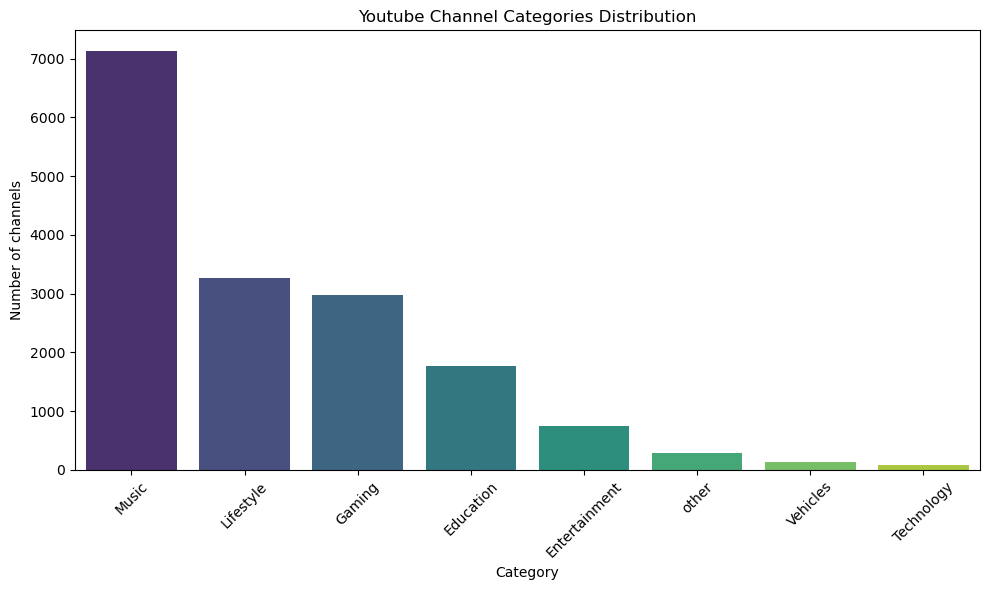

In [14]:
category_counts = df['category'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=category_counts.index, y=category_counts.values, hue=category_counts.index, palette='viridis')
plt.title("Youtube Channel Categories Distribution")
plt.xlabel("Category")
plt.ylabel("Number of channels")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

DESCRIPTION LENGTH ANALYSIS

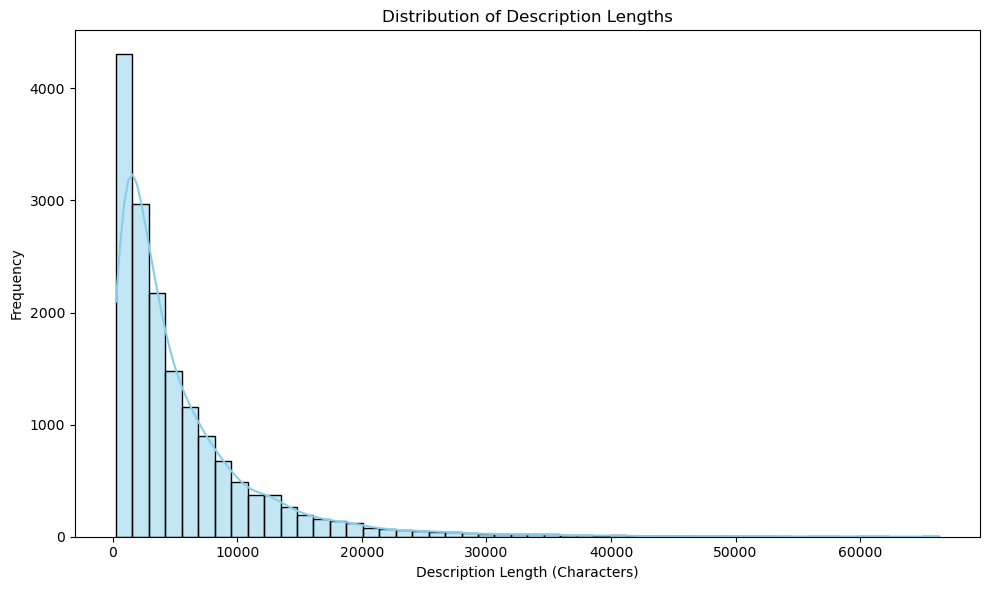

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df["desc_length"], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Description Lengths")
plt.xlabel("Description Length (Characters)")
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

AVERAGE DESCRIPTION LENGTH PER CATEGORY

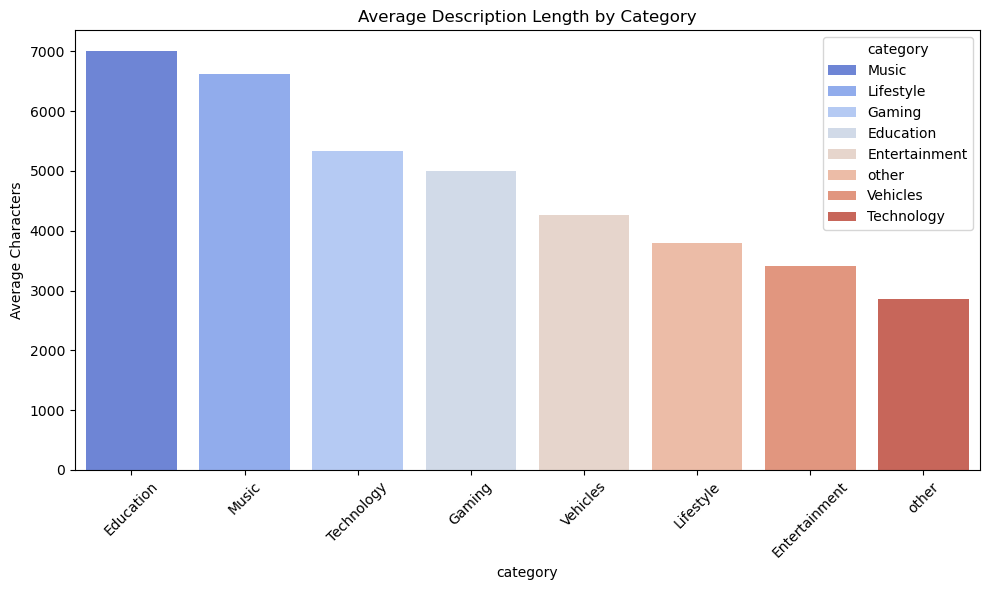

In [18]:
Avglen = df.groupby('category')['desc_length'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=Avglen.index, y=Avglen.values, hue=category_counts.index, palette='coolwarm' )
plt.title('Average Description Length by Category')
plt.ylabel('Average Characters')
plt.xticks(rotation =45)
plt.tight_layout()
plt.show()

Conclusion

1.The dataset was cleaned and explored to uncover meaningful insights about video performance.

2.Visualizations helped identify top categories, popular videos, and viewer engagement trends.

3.The analysis provides useful data-driven insights to support content creation and strategy decisions.